**Fill the Code blocks according to the comments provided as hints**

In [ ]:
from sklearn.datasets import load_diabetes #We will use this dataset
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#import libraries for numpy, Linear regression, r2_score, train_test_split

In [ ]:
X,y = load_diabetes(return_X_y=True)  #loading dataset


In [ ]:
#print shape of X and y and write in a text block what do you observe about both 
X.shape



(442, 10)

In [ ]:
y.shape


(442,)

In [ ]:
#split the dataset into Train(80%) and Test(20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = 13)


In [ ]:
X_train.shape


(353, 10)

In [ ]:
X_test.shape

(89, 10)

In [ ]:
#fit X,y in Linear Regression Model of sklearn
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#print coefficients and intercepts (in @d gradient descent in was only m and b but as it is n dimensional it will have n coefficients and 1 intercept)
print(linear_regression_model.coef_)
print(linear_regression_model.intercept_)


[ -17.28691266 -248.0885923   578.27946674  315.72999856 -571.32572115
  292.43070367  -17.46493017  120.18338433  695.01416778  108.05301725]
150.23367667649734


In [ ]:
#predict on X_test and calculate r2_score
linear_regression_predict = linear_regression_model.predict(X_test)
linear_regression_predict


array([244.7356705 ,  45.5798109 , 152.6139604 , 189.14187388,
       287.95570112, 141.66018151, 169.12824302, 207.04479588,
       227.4850802 ,  78.36988497, 183.50872188, 238.99772287,
        86.6929473 , 183.48504847, 166.53286332, 119.85934763,
       108.76252936, 236.35456329,  93.2354526 , 186.02210321,
        82.1016238 , 113.74702818,  74.02550595,  93.58173661,
       144.48432216, 186.20837792,  82.62099988, 148.29921608,
       164.2860916 ,  42.82742992, 220.28026548, 113.62019104,
       160.29777609, 167.08233355, 257.2361289 , 189.69456314,
       125.20088508, 155.46759104, 178.84899821, 109.59029315,
       112.37558141, 176.48600351, 118.15556206, 145.64710936,
       197.44686775, 146.13072177,  84.39324573,  45.65270231,
        39.82173344, 141.33550904,  92.41386206, 187.94664065,
        36.59787117, 154.69450946, 120.74715615,  88.67241388,
       193.35173976, 106.38531303, 201.12367932, 267.27072635,
       287.58218365, 175.5938382 ,  65.70449486,  78.17

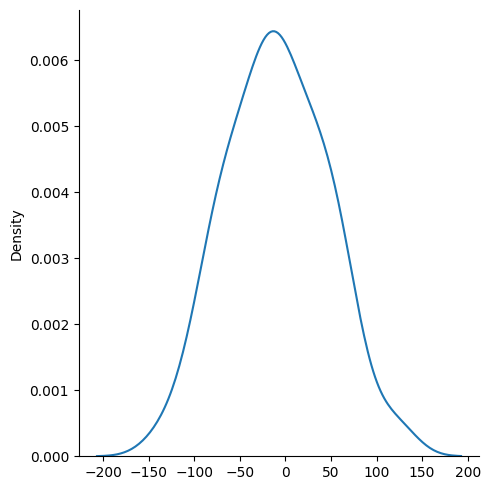

In [ ]:
import seaborn as sns
sns.displot(linear_regression_predict-y_test,kind = 'kde')

In [ ]:
score = r2_score(y_test,linear_regression_predict)
score

0.3670103737004131

In [ ]:
#print X_train shape
X_train.shape

(353, 10)

In [ ]:
#Write GDregressor class


class GDRegressor:
  
  def __init__(self,learning_rate,epochs):
    self.coef_ = None
    self.intercept_ = None
    self.lr = learning_rate
    self.epochs = epochs
   # N = X_train.T.shape[1]
      
  def fit(self,X_train,y_train):
    # init your coefs
    self.intercept_ = 100 #initialise the intercept
    self.coef_ = np.zeros(10)#initialise the array of coefficients according to number of coefficients
    
    for i in range(self.epochs):
      # update all the coef and the intercept
      y_hat = np.dot(X_train, self.coef_) + self.intercept_#apply prediction formula i.e. (y_hat = coefficient*X + intercept) in terms of matrices coefficient and X   
      intercept_derivative =-2*np.sum((y_train-y_hat)) #find derivative matrix 
      self.intercept_ =self.intercept_- self.lr*intercept_derivative#update intercept using above intercept_derivative
      
      coef_derivative =-2*np.dot(X_train.T,y_train-y_hat) #derivative matrix for all coefficients in a single step
      self.coef_ =self.coef_- ((self.lr)*coef_derivative) #update intercept using coef_derivative
      
      # print the coefficients array and the intercept
    print(self.intercept_)
    print(self.coef_)  
          
    #linear_regression= GDRegressor(0.01,100)
    #linear_regression.fit(X_train,y_train)
    #print(linear_regression.coef)  
    #print(linear_regression.intercept)

    
  def predict(self,X_test):
    return  np.dot(X_test,self.coef_) +self.intercept_
    #new prediction in the form of (y = coefficients*X + intercept) using matrices
    

In [ ]:
#call GDRegressor by keeping epochs and learning rate according to you and keep changing it for better results
linear_regression = GDRegressor(0.001,1000)
#linear_regression.fit(X_train,y_train)

In [ ]:
#fit X_train, y_train into GDRegressor object using function of the class
linear_regression.fit(X_train,y_train)

150.23725193594888
[   7.28638412 -169.7321712   496.61284235  295.11622287  -23.86094609
  -84.77618093 -205.18299094  132.89032183  371.49696294  162.51495802]


In [ ]:
#predict on X_test using function of the class
y_pred_one  = linear_regression.predict(X_test)
y_pred_one

array([227.82763244,  57.98102837, 144.40343537, 187.02952714,
       261.51197424, 134.86578323, 169.92543335, 196.10229126,
       231.02930316,  86.78280965, 173.03286383, 230.25746461,
        96.56106582, 182.68776003, 163.28758139, 122.09981374,
        94.33610427, 228.30047314,  86.59434148, 179.33588963,
        87.86696158, 134.27754714,  81.42764593, 102.53132138,
       149.96731075, 176.60488098,  80.60272167, 140.45623187,
       169.14037577,  66.37339833, 212.56020304, 133.7477088 ,
       153.05103526, 151.38359061, 241.37836646, 181.13200733,
       120.03317742, 152.10081502, 173.79896718, 109.05003364,
       118.29900324, 178.95523155, 124.28300645, 139.97944715,
       204.70493895, 156.91180845,  94.01275866,  50.79793932,
        56.87605773, 127.18011927,  85.47000102, 190.0332009 ,
        68.06862121, 148.92706909, 127.63640025,  89.26157737,
       184.10834195, 100.31744733, 203.87457465, 261.39424421,
       284.3736789 , 169.78855819,  67.77857226,  83.08

In [ ]:
#calculate r2_score to verify
r2_score( y_test,y_pred_one)


0.37737572232626726